In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Financial_Fraud =  pd.read_csv('Financial_Fraud.csv')

In [3]:
Financial_Fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
Financial_Fraud.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
14242,8,PAYMENT,20924.47,C1540995845,18265.0,0.00,M1309313968,0.0,0.0,0.0,0.0
14243,8,CASH_OUT,75244.54,C1827218030,38369.0,0.00,C1292445663,167.0,0.0,0.0,0.0
14244,8,PAYMENT,3074.36,C1632817923,10242.0,7167.64,M2001030591,0.0,0.0,0.0,0.0
14245,8,PAYMENT,11465.21,C1837637612,38.0,0.00,M1222093409,0.0,0.0,0.0,0.0
14246,8,CASH_OUT,71154.12,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Financial_Fraud.shape

(14247, 11)

In [6]:
Financial_Fraud.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
# Identify missing values
Missing_Values= Financial_Fraud.isnull().sum()
Missing_Values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [8]:
# Identify duplicated values
duplicates = Financial_Fraud.duplicated().sum()
duplicates

0

In [9]:
Financial_Fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,14247.000000,1.424700e+04,1.424600e+04,1.424600e+04,1.424600e+04,1.424600e+04,14246.000000,14246.0
mean,5.037131,1.118848e+05,7.937369e+05,8.107136e+05,8.411336e+05,1.147629e+06,0.005475,0.0
std,2.463112,2.805152e+05,2.016693e+06,2.059984e+06,2.528174e+06,3.151706e+06,0.073794,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,2.000000,4.585130e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,6.000000,1.286936e+04,2.041500e+04,8.216325e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,7.000000,1.218917e+05,1.384956e+05,1.294173e+05,2.641427e+05,2.775150e+05,0.000000,0.0
max,8.000000,1.000000e+07,1.293042e+07,1.301050e+07,2.093759e+07,2.533027e+07,1.000000,0.0


In [10]:
Financial_Fraud.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.040947,-0.065173,-0.065322,-0.005285,0.033043,-0.024286,NaN
amount,0.040947,1.000000,0.092782,0.062145,0.362895,0.459616,0.133739,NaN
oldbalanceOrg,-0.065173,0.092782,1.000000,0.996683,0.196803,0.148137,-0.005359,NaN
newbalanceOrig,-0.065322,0.062145,0.996683,1.000000,0.203862,0.150776,-0.027849,NaN
oldbalanceDest,-0.005285,0.362895,0.196803,0.203862,1.000000,0.908342,-0.018103,NaN
newbalanceDest,0.033043,0.459616,0.148137,0.150776,0.908342,1.000000,-0.009828,NaN
isFraud,-0.024286,0.133739,-0.005359,-0.027849,-0.018103,-0.009828,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Get unique values in a column
unique_values = Financial_Fraud['type'].unique()
unique_values

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
# Get unique values in a column
unique_values_1 = Financial_Fraud['isFraud'].unique()
unique_values_1

array([ 0.,  1., nan])

In [13]:
Financial_Fraud['isFraud'].value_counts()

0.0    14168
1.0       78
Name: isFraud, dtype: int64

In [14]:
unique_values_2 = Financial_Fraud['isFlaggedFraud'].unique()
unique_values_1

array([ 0.,  1., nan])

In [15]:
Financial_Fraud['isFlaggedFraud'].value_counts()

0.0    14246
Name: isFlaggedFraud, dtype: int64

In [16]:
payment_totals = Financial_Fraud.groupby('type')['amount'].sum()
payment_totals

type
CASH_IN     4.147598e+08
CASH_OUT    3.636374e+08
DEBIT       1.517395e+06
PAYMENT     6.197091e+07
TRANSFER    7.521378e+08
Name: amount, dtype: float64

In [17]:
payment_mean = Financial_Fraud.groupby('type')['amount'].mean()
payment_mean

type
CASH_IN     167783.093350
CASH_OUT    176952.518068
DEBIT         3674.080508
PAYMENT       7875.321904
TRANSFER    523044.334318
Name: amount, dtype: float64

In [18]:
payment_median = Financial_Fraud.groupby('type')['amount'].median()
payment_median

type
CASH_IN     138605.865
CASH_OUT    132163.700
DEBIT         3047.660
PAYMENT       5922.530
TRANSFER    334514.145
Name: amount, dtype: float64

In [19]:
payment_count = Financial_Fraud.groupby('type')['amount'].count()
payment_count

type
CASH_IN     2472
CASH_OUT    2055
DEBIT        413
PAYMENT     7869
TRANSFER    1438
Name: amount, dtype: int64

In [20]:
Sus_Transactions = Financial_Fraud[Financial_Fraud['amount']>20000]
print(Sus_Transactions)

       step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
15        1  CASH_OUT  229133.94   C905080434       15325.00             0.0   
19        1  TRANSFER  215310.30  C1670993182         705.00             0.0   
24        1  TRANSFER  311685.89  C1984094095       10835.00             0.0   
35        1   PAYMENT   24213.67  C1238616099           0.00             0.0   
42        1  CASH_OUT  110414.71   C768216420       26845.41             0.0   
...     ...       ...        ...          ...            ...             ...   
14240     8  TRANSFER  316035.90  C1785722147       32835.00             0.0   
14241     8   PAYMENT   35108.12  C1925841262           0.00             0.0   
14242     8   PAYMENT   20924.47  C1540995845       18265.00             0.0   
14243     8  CASH_OUT   75244.54  C1827218030       38369.00             0.0   
14246     8  CASH_OUT   71154.12            C            NaN             NaN   

          nameDest  oldbalanceDest  new

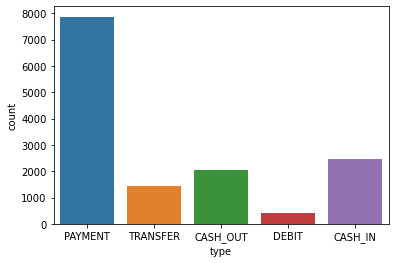

In [21]:
# countplot
sns.countplot(x='type', data=Financial_Fraud)
plt.show()

<AxesSubplot:xlabel='amount', ylabel='Count'>

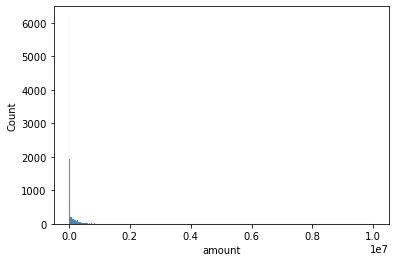

In [22]:
sns.histplot(data=Financial_Fraud, x='amount')

<AxesSubplot:xlabel='oldbalanceOrg', ylabel='Count'>

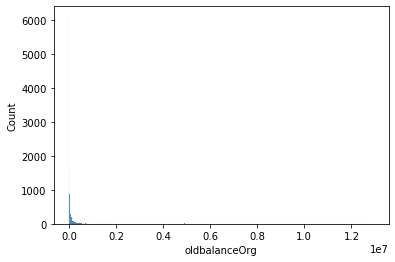

In [23]:
sns.histplot(data=Financial_Fraud, x='oldbalanceOrg')

<AxesSubplot:xlabel='newbalanceOrig', ylabel='Count'>

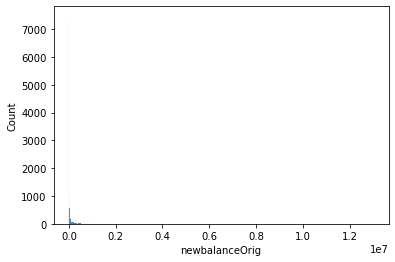

In [24]:
sns.histplot(data=Financial_Fraud, x='newbalanceOrig')

<AxesSubplot:>

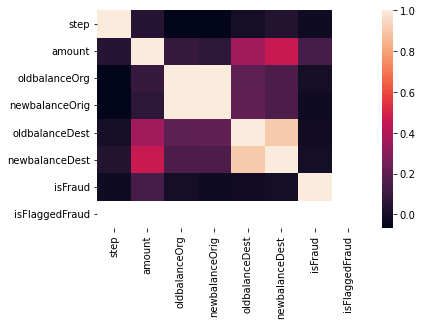

In [25]:
sns.heatmap(data=Financial_Fraud.corr())

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
# Created a standard scaler object
scaler = StandardScaler()

# Scaled the transaction amount feature
Financial_Fraud['scaled_amount'] = scaler.fit_transform(Financial_Fraud['amount'].values.reshape(-1, 1))

In [28]:
# Feature Engineering:

In [29]:
# Time between transactions
Financial_Fraud['time_since_last_transaction'] = Financial_Fraud.groupby('nameOrig')['step'].diff().fillna(0)

# Binary features
Financial_Fraud['large_transaction'] = (Financial_Fraud['amount'] > 1000000).astype(int)
Financial_Fraud['new_account'] = ((Financial_Fraud['oldbalanceOrg'] == 0) & (Financial_Fraud['newbalanceOrig'] == 0)).astype(int)

# Transaction amount ratios
Financial_Fraud['oldbalanceOrg_ratio'] = Financial_Fraud['oldbalanceOrg'] / (Financial_Fraud['amount'] + 1)
Financial_Fraud['newbalanceOrig_ratio'] = Financial_Fraud['newbalanceOrig'] / (Financial_Fraud['amount'] + 1)

# Transaction frequency
Financial_Fraud['transaction_frequency'] = Financial_Fraud.groupby('nameOrig')['nameOrig'].transform('count')


In [30]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = Financial_Fraud.drop('isFraud', axis=1)
y = Financial_Fraud['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
Financial_Fraud.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,scaled_amount,time_since_last_transaction,large_transaction,new_account,oldbalanceOrg_ratio,newbalanceOrig_ratio,transaction_frequency
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,-0.363791,0.0,0,0,17.289119,16.289221,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,-0.392223,0.0,0,0,11.391855,10.392391,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,-0.398224,0.0,0,0,0.994505,0.000000,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,-0.398224,0.0,0,0,0.994505,0.000000,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,-0.357272,0.0,0,0,3.561016,2.561102,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14241,8,PAYMENT,35108.12,C1925841262,0.0,0.00,M828869162,0.0,0.0,0.0,0.0,-0.273709,0.0,0,1,0.000000,0.000000,1
14242,8,PAYMENT,20924.47,C1540995845,18265.0,0.00,M1309313968,0.0,0.0,0.0,0.0,-0.324273,0.0,0,0,0.872860,0.000000,1
14243,8,CASH_OUT,75244.54,C1827218030,38369.0,0.00,C1292445663,167.0,0.0,0.0,0.0,-0.130622,0.0,0,0,0.509917,0.000000,1
14244,8,PAYMENT,3074.36,C1632817923,10242.0,7167.64,M2001030591,0.0,0.0,0.0,0.0,-0.387909,0.0,0,0,3.330342,2.330667,1


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the features and target
features = ['amount']
target = 'isFraud'

# Split the dataset into features and target variable
X = Financial_Fraud[features]
y = Financial_Fraud[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [34]:
# Save the adjusted dataset to a new csv file
Financial_Fraud.to_csv('financial_fraud_adjusted.csv', index=False)